In [7]:
import numpy as np
import scipy.stats as stat
import re
import os
import sys
sys.path.insert(0, 'D:/software/')
from Biomol import HDF5_trast as t5
from Biomol import StyleTools as st
from Biomol import ImageLab as iml

import h5py
import pandas as pd
from pandas import DataFrame

import pytiff
from PIL import Image
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

%load_ext autoreload
%autoreload 2


    
  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Structure of the TRAST file
directory=r'D:/new trast test data/TRAST curve/'
filename = 'different pH (only K+, Kb free , fit again).hdf5'
file = directory + filename
with h5py.File(file,'r') as f:
    for key in f.keys():
        print(key)
        for i in np.array(f[key]):
            print(i)


            

007_POPC-244nM-NAO-Air-PBS-PH10.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
008_POPC-244nM-NAO-Air-PBS-PH3.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
008_POPC-244nM-NAO-Air-PBS-PH9.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
009_POPC-244nM-NAO-Air-PBS-PH5.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
011_POPC-244nM-NAO-Air-PBS-PH11.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
012_POPC-244nM-NAO-Air-PBS-PH12.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp


In [2]:

# plot different shells
directory=r'D:/new trast test data/different shells (kisc fix green channel)/'
import pandas as pd
filelist=os.listdir(directory)
filelist=[directory+ i for i in filelist if 'hdf5' in os.path.splitext(i)[1]]  #select csv file
print(filelist)
for file in filelist:
    with h5py.File(file,'r') as f:
        for key in f.keys():
            print(key)
            for i in np.array(f[key]):
                print(i)


['D:/new trast test data/different shells (kisc fix green channel)/shell1.hdf5', 'D:/new trast test data/different shells (kisc fix green channel)/shell2.hdf5', 'D:/new trast test data/different shells (kisc fix green channel)/shell3.hdf5', 'D:/new trast test data/different shells (kisc fix green channel)/shell4.hdf5']
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp


In [8]:

# change some of key name#
with h5py.File(file) as f:
    #f.move('007_HQ574_54M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit',r'007_HQ574\54M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    #f.move('008_D620_40M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit',r'008_D620\40M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    #f.move('009_ET670_50M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit',r'009_ET670\50M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    f.move('007_POPC-244nM-NAO-Air-PBS-PH7.4.fit','007_0uM-oldDoxyl-POPC-244nM-NAO-Air-PBS-PH7.4.fit')
 

In [9]:

#delete some datasets which do not use
with h5py.File(file) as f:
    del f['002_IRF-Rho-20uM-red-OD3-200mW.fit']
    for key in f.keys():
        print(key)
        for i in np.array(f[key]):
            print(i)


KeyError: "Couldn't delete link (callback link pointer is NULL (specified link may be '.' or not exist))"

007_POPC-244nM-NAO-Air-PBS-PH10.fit
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
008_POPC-244nM-NAO-Air-PBS-PH3.fit
008_POPC-244nM-NAO-Air-PBS-PH9.fit
009_POPC-244nM-NAO-Air-PBS-PH5.fit
011_POPC-244nM-NAO-Air-PBS-PH11.fit
012_POPC-244nM-NAO-Air-PBS-PH12.fit


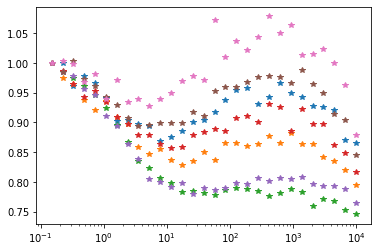

In [10]:
# draw raw data
with h5py.File(file,'r') as f:
    for key in f.keys():
        print(key)
        N= np.array(f[key]['TRAST'][:,0]) #choose first point
        arry_x=np.array(f[key]['tp'][:])
        arry_y=np.array(f[key]['TRAST']/N) # Normalize the first point
        arry_y=arry_y[0]
        plt.semilogx(arry_x,arry_y,marker='*',linestyle='none')

007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit
007_POPC-244nM-NAO-Air-PBS-PH7.4.fit


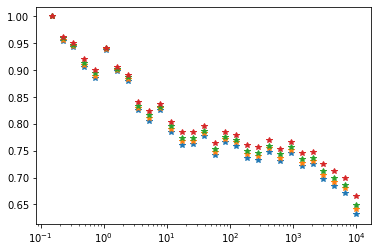

In [3]:

# plot different shells raw data
for file in filelist:
    with h5py.File(file,'r') as f:
        for key in f.keys():
            print(key)
            N= np.array(f[key]['TRAST'][:,0]) #choose first point
            arry_x=np.array(f[key]['tp'][:])
            arry_y=np.array(f[key]['TRAST']/N) # Normalize the first point
            arry_y=arry_y[0]
            plt.semilogx(arry_x,arry_y,marker='*',linestyle='none')


In [5]:
#pickData(file,'tp')

In [18]:

def pickData1(filename,key,Data):
    with h5py.File(filename,'r') as f:
        return f[key][Data][:]

In [40]:
pickData1(file,'007_POPC-244nM-NAO-Air-PBS-PH7.4.fit','rawTp')

array([1.5000000e-04, 2.2500000e-04, 3.2500000e-04, 4.8750000e-04,
       7.2500000e-04, 1.0875000e-03, 1.6125000e-03, 2.4000000e-03,
       3.5625000e-03, 5.3000000e-03, 7.8750000e-03, 1.1725000e-02,
       1.7437500e-02, 2.5925000e-02, 3.8562500e-02, 5.7362500e-02,
       8.5312500e-02, 1.2690000e-01, 1.8873750e-01, 2.8072500e-01,
       4.1753750e-01, 6.2101250e-01, 9.2367500e-01, 1.3738250e+00,
       2.0433625e+00, 3.0392000e+00, 4.5203500e+00, 6.7233625e+00,
       1.0000000e+01])

In [15]:
#pickData1(file,'012_POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit','HDfit')

In [10]:
'''
def TRASTaxes(fig, size=(6,5), ratio=0.2):
    
    # Structure

    axMain = fig.add_axes([0, ratio, 1, 1-ratio])
    axRes = fig.add_axes([0, 0, 1, ratio])
    
    # Style
    axMain.get_xaxis().set_visible(False)
    axRes.set_xscale('log')
    axMain.set_xscale('log')
    
    return fig, axMain, axRes   
'''

"\ndef TRASTaxes(fig, size=(6,5), ratio=0.2):\n    \n    # Structure\n\n    axMain = fig.add_axes([0, ratio, 1, 1-ratio])\n    axRes = fig.add_axes([0, 0, 1, ratio])\n    \n    # Style\n    axMain.get_xaxis().set_visible(False)\n    axRes.set_xscale('log')\n    axMain.set_xscale('log')\n    \n    return fig, axMain, axRes   \n"

In [14]:
'''
# Function for making box plots with all data points shown within
def dotBox(df,col='kt',by=['CoA','SP'],rot=0, ax=None, ylim = None, color=None, alpha=0.5):
    
    if not ax == None:
        df.boxplot(column=col, by=by,figsize=(15,7),rot=rot,notch=True, bootstrap=1000, showfliers=False, ax=ax)
    else:
        df.boxplot(column=col, by=by,figsize=(15,7),rot=rot,notch=True, bootstrap=1000, showfliers=False)
    
    for i,d in enumerate(df.groupby(by)):
        y = d[1][col]
        x = np.random.normal(i+1, 0.1, len(y))
        if not color == None:
            plt.plot(x, y, mec='none', ms=4, marker="o", linestyle="None",alpha=alpha, color=color[i])  
        else:
            plt.plot(x, y, mec='none', ms=4, marker="o", linestyle="None",alpha=alpha)  
        
    if not ylim == None:
        ax.set_ylim(ylim)
        
    fig = ax.get_figure()
    fig.suptitle('')
    ax.set_title('')
'''

In [15]:
'''
def significance(data1, data2):
    
    import scipy.stats as stat
    
    #s, p = stat.ttest_ind(a, b)
    #print('Welch\'s T-test:' +'statistic = '+str(s)+', p-value = '+str(p))
    s, p = stat.mannwhitneyu(data1, data2)
    
    # s = statistic
    # p = p-value
    # level = significance level (1 = 5 %, 2 = 1 %, 3 = 0.1 %)
    
    level=0
    if p <= 0.05:
        level=1
    if p <= 0.01:
        level=2
    if p <= 0.001:
        level=3
    
    return p, level
 '''

In [11]:
# Style definitions
axstyle = {'LegendSize':18,
           'LabelSize':20,
           'MajorTickWidth':1.5,
           'MajorTickLength':10,
           'MinorTickWidth':1.5,
           'MinorTickLength':5,
           'LabelFont':'Arial',
           'LegendFont':'Arial'}

inset_style = {'LegendSize':8,
               'LabelSize':8,
               'MajorTickWidth':1,
               'MajorTickLength':3,
               'MinorTickWidth':1,
               'MinorTickLength':1.5,
               'LabelFont':'Arial',
               'XLabelPad':-2,
               'YLabelPad':-3,
               'LegendFont':'Arial',
               'TickPad':1}

marker_style = {'markersize':2,
               'linestyle':'none',
               'marker':'s'}

line_style = {'linewidth':1.5}

dashed_line_style = {'linewidth':1.5,
                     'linestyle':'dashed',
                     'color':'gray'}

errorbar_style = {'markersize':4,
                  'linewidth':1.3,
                  'elinewidth':1.3,
                  'capsize':3}

legend_style = {'handlelength':2,
                'labelspacing':0.03}

TRAST_axis_label = {'xlabel':r'Pulse duration ($\mu$s)',
                    'ylabel':r'$\langle F_{exc}(w)\rangle_{norm}$'}

TRAST_axis_label_off = {'xlabel':r'Pulse duration ($\mu$s)',
                        'ylabel':r' ',
                        'rlabel':r' '}

panel_labelstyle={'fontsize':12, 'horizontalalignment':'center'}
text_labelstyle={'fontsize':12, 'horizontalalignment':'center'}

dashcolor = [0.2, 0.2, 0.2]

logminors = list(np.linspace(2, 9, 8)*0.1)+list(np.linspace(2, 9, 8))+list(np.linspace(2, 9, 8)*10)+\
            list(np.linspace(2, 9, 8)*100)+list(np.linspace(2, 9, 8)*1000)

In [33]:
#数据导入绘图后，在绘制legend的时候再改的方法，改变legend 的顺序

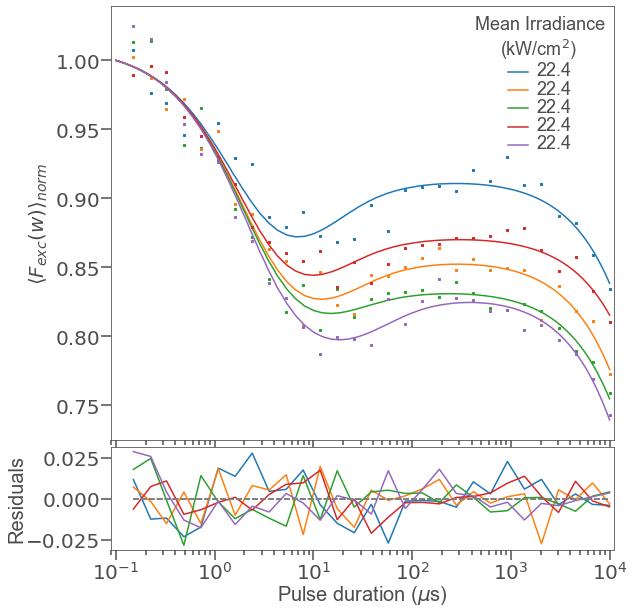

In [19]:
def plotfig_power(file):
    k01 = t5.pickDataset(file,'excRate')[:,0]*1e6 # s^-1
    excCross = 2.5262e-8*0.822*1e-8 # cm^2
    wave = 488e-9 # m
    h = 6.62607004e-34  #m^2 kg  s^-1
    c = 299792458 # m  s^-1

    irr = k01/excCross*h*c/wave*1e-3 # kW / cm^-2

    order = np.argsort(k01)


    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    with h5py.File(file,'r') as f:
        for i,k in enumerate(f.keys()):
                N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
                #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
                tp = f[k]['tp'][:]
                ind = np.argsort(tp)  #should not nessesary
                residual = f[k]['residual'][0,:]

                #Main plot
                hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
                axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='{0:.1f}'.format(irr[i]), **line_style)


                #residual plot
                hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
                axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    
    newhandles=[]
    newlabels=[]
    for n in order:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,handles=newhandles,labels=newlabels,title='Mean Irradiance\n     (kW/cm$^2$)', ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory+ filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

#plotfig_power(file)
    
    
    
    
 


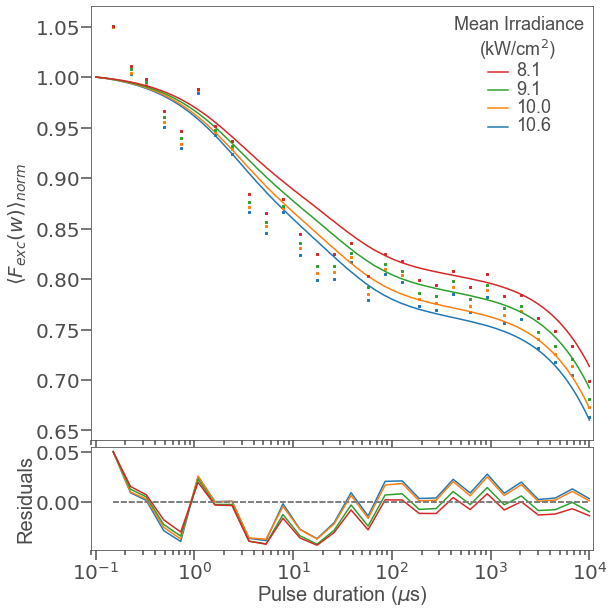

In [5]:
#plot different shells data
def plotfig_power_shells(filelist):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    irr_list = [] 
    
    for file in filelist:
        
        
        
        k01 = t5.pickDataset(file,'excRate')[:,0][0]*1e6 # s^-1
        
        
        excCross = 2.5262e-8*0.822*1e-8 # cm^2
        wave = 488e-9 # m
        h = 6.62607004e-34  #m^2 kg  s^-1
        c = 299792458 # m  s^-1

        irr = k01/excCross*h*c/wave*1e-3 # kW / cm^-2
        
        irr_list.append(irr)

    order = np.argsort(irr_list)
      

    for i, file in enumerate(filelist):
        with h5py.File(file,'r') as f:
            for k in f.keys():
                N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
                #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
                tp = f[k]['tp'][:]
                ind = np.argsort(tp)  #should not nessesary
                residual = f[k]['residual'][0,:]

                #Main plot
                hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
                axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='{0:.1f}'.format(irr_list[i]), **line_style)


                #residual plot
                hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
                axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)

    handles,labels = axMain.get_legend_handles_labels()
    
    newhandles=[]
    newlabels=[]
    for n in order:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,handles=newhandles,labels=newlabels,title='Mean Irradiance\n     (kW/cm$^2$)', ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory+ 'different shells'+ '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_power_shells(filelist)
    
    
    
    
 


[<matplotlib.lines.Line2D object at 0x000001E97A0A2630>, <matplotlib.lines.Line2D object at 0x000001E97A0A2470>, <matplotlib.lines.Line2D object at 0x000001E97A0A2668>, <matplotlib.lines.Line2D object at 0x000001E97A11D828>, <matplotlib.lines.Line2D object at 0x000001E97A129748>, <matplotlib.lines.Line2D object at 0x000001E97A133668>, <matplotlib.lines.Line2D object at 0x000001E97A13E588>]
['pH 10', 'pH 7.4', 'pH 3', 'pH 9', 'pH 5', 'pH 11', 'pH 12']


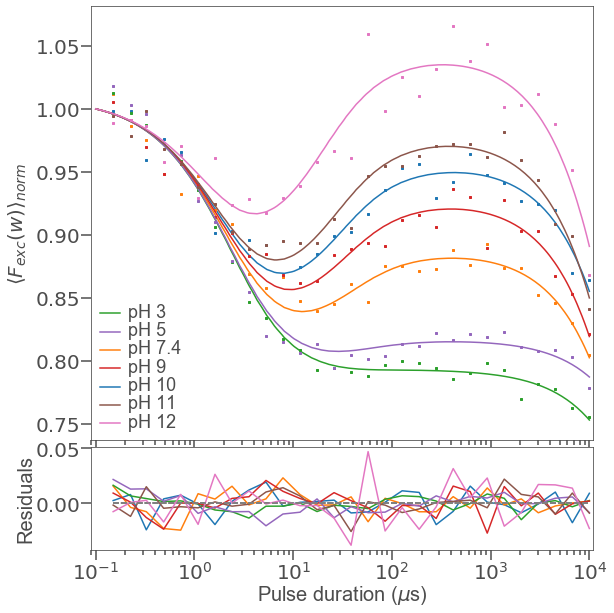

In [12]:
#pure differnet pH

def plotfig_ph(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='pH '+ k.split('.f')[0].split('H')[1], **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort=[]
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[1]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_ph(file)

[<matplotlib.lines.Line2D object at 0x000001E909FE1278>, <matplotlib.lines.Line2D object at 0x000001E909FE1E80>, <matplotlib.lines.Line2D object at 0x000001E976110AC8>, <matplotlib.lines.Line2D object at 0x000001E9009F51D0>, <matplotlib.lines.Line2D object at 0x000001E9009FF0F0>, <matplotlib.lines.Line2D object at 0x000001E9009FFFD0>, <matplotlib.lines.Line2D object at 0x000001E979FD8E48>]
['pH 10', 'pH 7.4', 'pH 3', 'pH 9', 'pH 5', 'pH 11', 'pH 12']


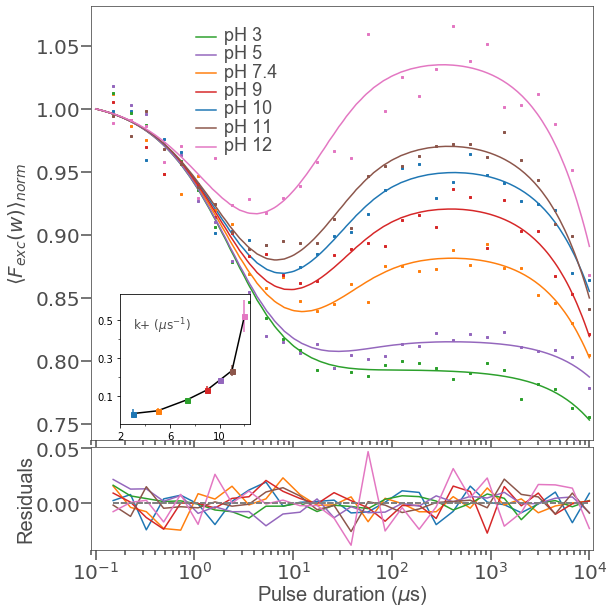

In [56]:
def plotfig_ph(file,axMain, axRes):
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='pH '+ k.split('.f')[0].split('H')[1], **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort=[]
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[1]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    
    axMain.legend(loc=[0.2,0.65],frameon=False,handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 

#Inset: fitted k+ rates for pH series
def pH_inset(file,ax):
    
    kp, [pH], err = t5.pickRate(file, 'k+', tags=['pH'], conf=True)
    
    pH_sort = []
    
    kp_sort = []
    ind=np.argsort(pH)
    
    for n in ind:
        pH_sort.append(pH[n])
        kp_sort.append(kp[n])
    
    


    for i in range(kp.shape[0]):
        hPlot = ax.errorbar(pH_sort[i], kp_sort[i], yerr=err[i,0], linestyle = 'none', marker='s', markersize=5)
    
    ax.plot(pH_sort, kp_sort,'k')
    #ax.set_ylabel(r'k+ ($\mu$s$^{-1}$)')
    ax.text(3, 0.45, r'k+ ($\mu$s$^{-1}$)', color=[0.3, 0.3, 0.3], size=12)
    #ax.set_xlabel('pH')
    ax.patch.set_alpha(0)

    #st.styleAxes(ax, inset_style)
    
    ax.set_xticks([2, 6, 10])
    ax.set_xticks([4, 8,12], minor=True)
    ax.set_yticks([0.1, 0.3, 0.5])
    ax.set_yticks([0.2, 0.4], minor=True)
    
#PLOT the figure
fig = plt.figure(figsize=(9,10))
gs = gridspec.GridSpec(5,4,hspace=0.07)
axMain=plt.subplot(gs[:-1,:])
axRes=plt.subplot(gs[-1,:])

# pH series
#axRes = fig.add_axes([0.1, 0.1, 0.98, 0.25])
#axMain = fig.add_axes([0.1, 0.35, 0.98, 0.8])

plotfig_ph(file,axMain, axRes)

# Inset: kp rate
ax = fig.add_axes([0.17,0.3,0.2,0.18])
pH_inset(file,ax)


plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
plt.show()

In [24]:
kplus, [P], err = t5.pickRate(file, 'k+', tags=['pH'], conf=True)
print(kplus)


[0.18434247 0.08215693 0.00885562 0.13384066 0.02337025 0.23520879
 0.5222749 ]


[<matplotlib.lines.Line2D object at 0x000002B2397C4E80>, <matplotlib.lines.Line2D object at 0x000002B2397C4E48>, <matplotlib.lines.Line2D object at 0x000002B2397CA080>, <matplotlib.lines.Line2D object at 0x000002B2398361D0>, <matplotlib.lines.Line2D object at 0x000002B23983E0B8>]
['0 $μ$M', '20 $μ$M', '30 $μ$M', '50 $μ$M', '100 $μ$M']


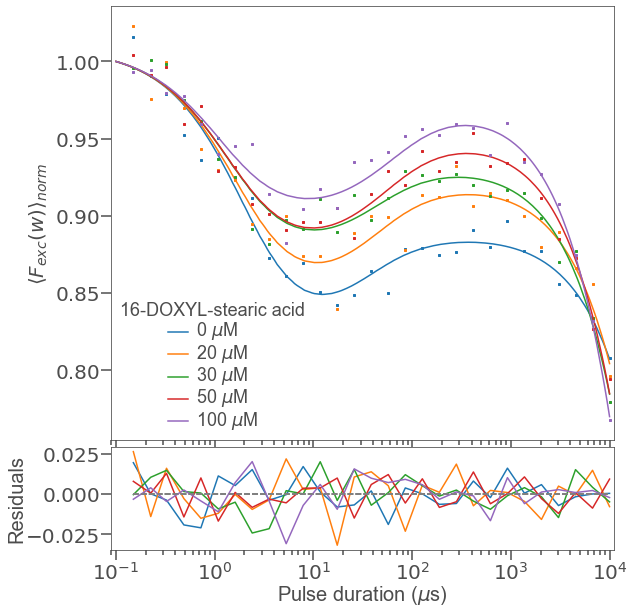

In [11]:
def plotfig_doxyl(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('u')[0] + ' $\u03BC$M', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = '16-DOXYL-stearic acid', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_doxyl(file)

[<matplotlib.lines.Line2D object at 0x000001FB24A06BE0>, <matplotlib.lines.Line2D object at 0x000001FB24A06A20>, <matplotlib.lines.Line2D object at 0x000001FB24A06C18>, <matplotlib.lines.Line2D object at 0x000001FB2730CDD8>, <matplotlib.lines.Line2D object at 0x000001FB27318CF8>, <matplotlib.lines.Line2D object at 0x000001FB27322C18>]
['0 mM', '200 mM', '350 mM', '50 mM', '100 mM', '500 mM']


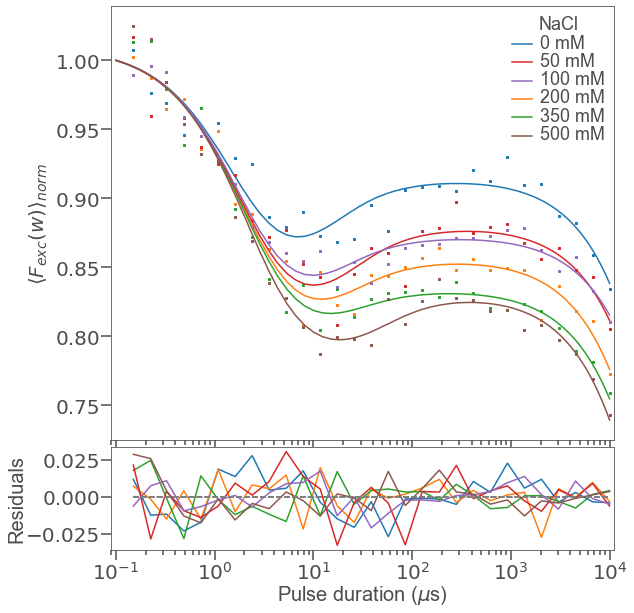

In [29]:
def plotfig_NaCl(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('mM')[0] + ' mM', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'NaCl', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

#plotfig_NaCl(file)

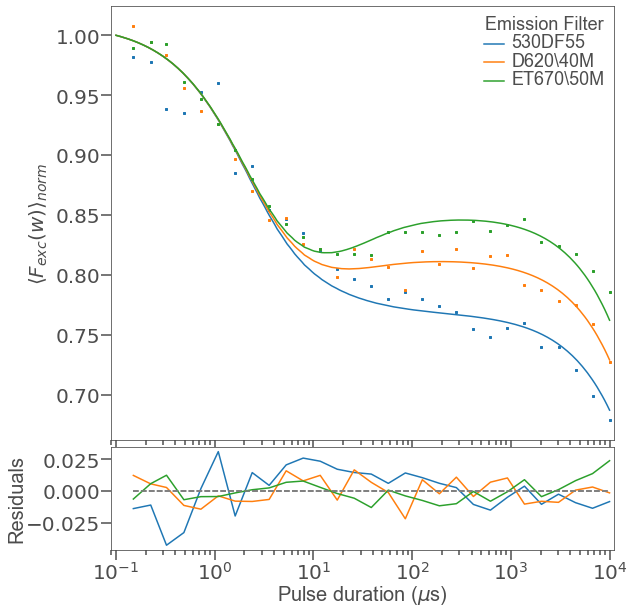

In [73]:
def plotfig_filters(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('-POPC')[0].split('_')[1], 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    '''
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
     '''   
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Emission Filter', ncol=1, **legend_style) #DEL handles=newhandles,labels=newlabels,

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_filters(file)

[<matplotlib.lines.Line2D object at 0x000001FB257DB860>, <matplotlib.lines.Line2D object at 0x000001FB257A3BE0>, <matplotlib.lines.Line2D object at 0x000001FB257C9400>, <matplotlib.lines.Line2D object at 0x000001FB274CBB38>, <matplotlib.lines.Line2D object at 0x000001FB27645A58>]
['1 mM', '100 mM', '200 mM', '350 mM', '500 mM']


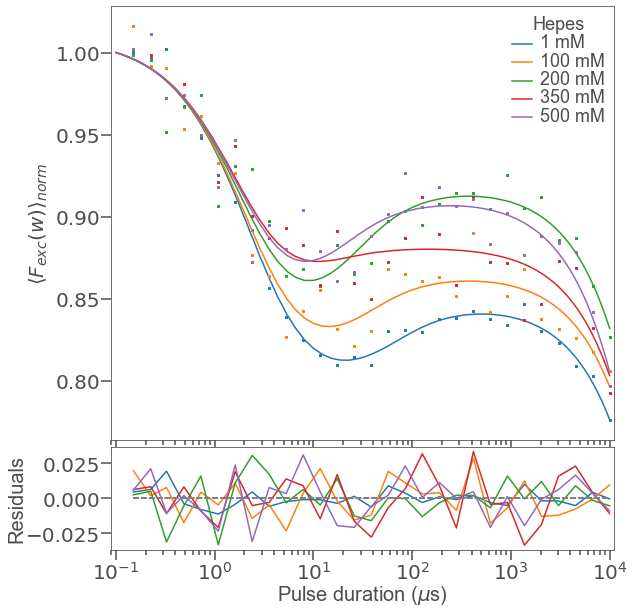

In [66]:
def plotfig_hepes(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('mM')[0] + ' mM', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Hepes', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_hepes(file)

In [ ]:
def plotfig_rawdata(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('mM')[0] + ' mM', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Hepes', ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_rawdata(file)